# LoC proportional thresholding and quantification notebook

This notebook loads a set of Z-tracks taken across an image volume from the lung-on-a-chip project and thresholds positive/negative expression of set markers based on a manual and unbiased assessment of the underlying images:

1. Load z-tracks, segmentation and images.
2. Initiate a Napari viewer with key bindings to annotate positive/negative expressing cells
3. Assess results
4. Quantify based on manually chosen thresholds

In [ ]:
import btrack # import tracking software
import napari # image viewer
from skimage import io # image loader and viewer
import os # for filename manipulations
import glob # for more fn operations 
import pandas as pd # module for data org 
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # module for plotting
import numpy as np # for math operations
import re
from tqdm.auto import tqdm
from homuncu_loc import dataio
sns.set(font='Nimbus Sans', style = 'white') # my favourite formatting :)
sns.set_palette('PiYG') # my favourite colours :D 

## 1. Load images and labels

In [4]:
pct_threshold = 0.3

  0%|          | 0/22 [00:00<?, ?it/s]

[INFO][2024/04/24 04:27:00 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1440_iat2.h5...
[INFO][2024/04/24 04:27:00 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:27:00 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:27:00 PM] Loading objects/obj_type_2 (37477, 5) (37477 filtered: None)
[INFO][2024/04/24 04:27:12 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:27:12 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1440_iat2.h5



 20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1440_iat2.h5
Number of channel 1 positive cells: 2952
Number of channel 1 negative cells: 299
Percentage of positive cells: 90.80%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


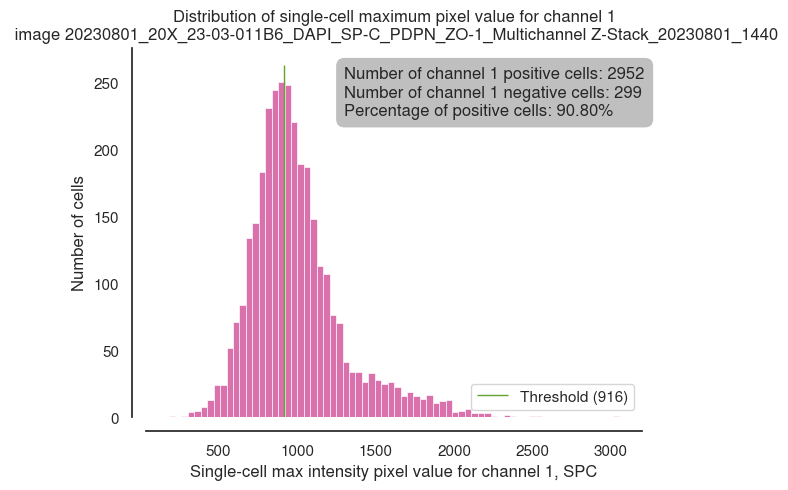


 20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1440_iat2.h5
Number of channel 2 positive cells: 3251
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


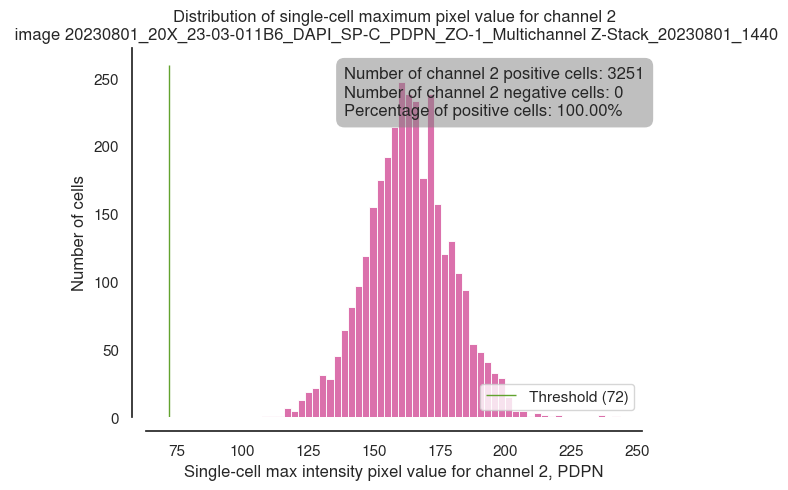

[INFO][2024/04/24 04:27:21 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1439_iat2.h5...
[INFO][2024/04/24 04:27:21 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:27:21 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:27:21 PM] Loading objects/obj_type_2 (45921, 5) (45921 filtered: None)
[INFO][2024/04/24 04:27:32 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:27:32 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1439_iat2.h5



 20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1439_iat2.h5
Number of channel 1 positive cells: 3266
Number of channel 1 negative cells: 393
Percentage of positive cells: 89.26%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


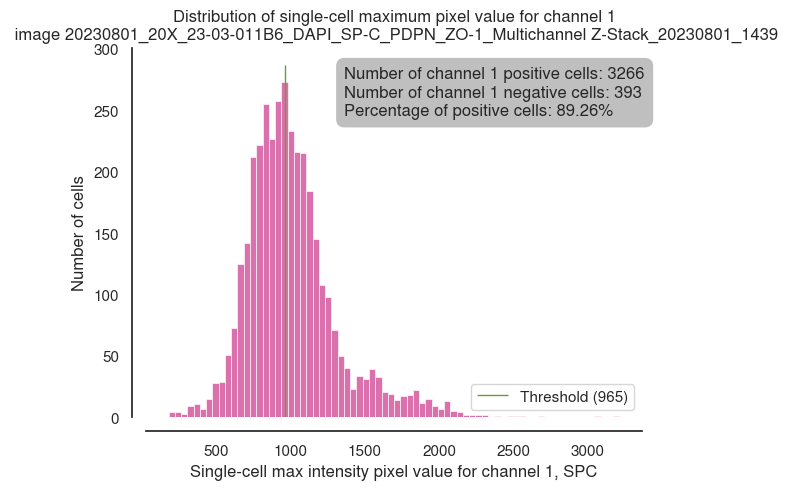


 20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1439_iat2.h5
Number of channel 2 positive cells: 3659
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


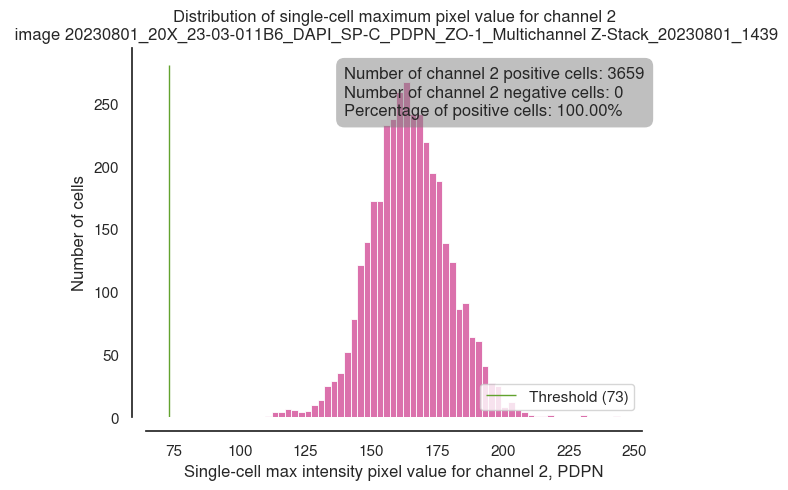

[INFO][2024/04/24 04:27:40 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1445_iat2.h5...
[INFO][2024/04/24 04:27:40 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:27:40 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:27:40 PM] Loading objects/obj_type_2 (23179, 5) (23179 filtered: None)
[INFO][2024/04/24 04:27:52 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:27:52 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1445_iat2.h5



 20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1445_iat2.h5
Number of channel 1 positive cells: 375
Number of channel 1 negative cells: 1623
Percentage of positive cells: 18.77%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


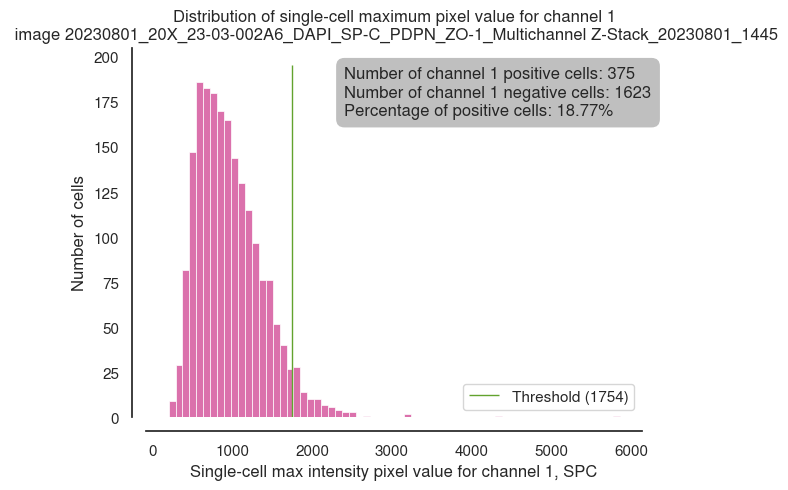


 20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1445_iat2.h5
Number of channel 2 positive cells: 1998
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


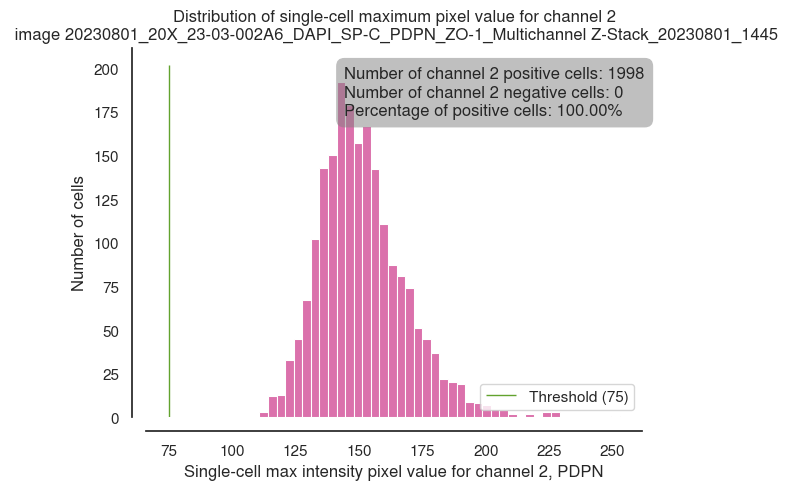

[INFO][2024/04/24 04:27:59 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_295_iat2.h5...
[INFO][2024/04/24 04:27:59 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:27:59 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:27:59 PM] Loading objects/obj_type_2 (1166, 5) (1166 filtered: None)
[INFO][2024/04/24 04:28:12 PM] Loading segmentation (81, 2304, 2304)
[INFO][2024/04/24 04:28:12 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_295_iat2.h5



 20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_295_iat2.h5
Number of channel 1 positive cells: 53
Number of channel 1 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


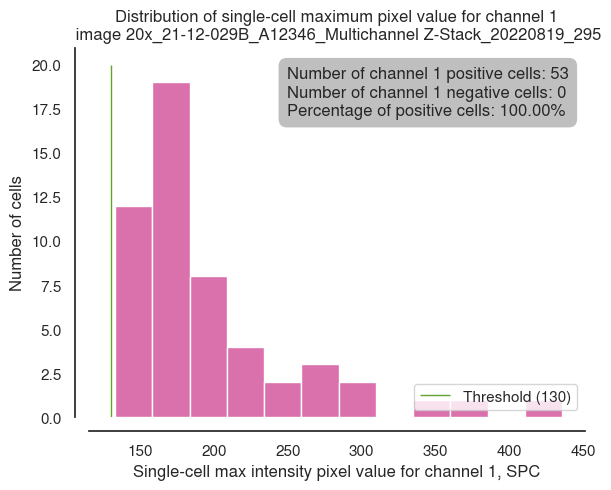


 20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_295_iat2.h5
Number of channel 2 positive cells: 1
Number of channel 2 negative cells: 52
Percentage of positive cells: 1.89%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


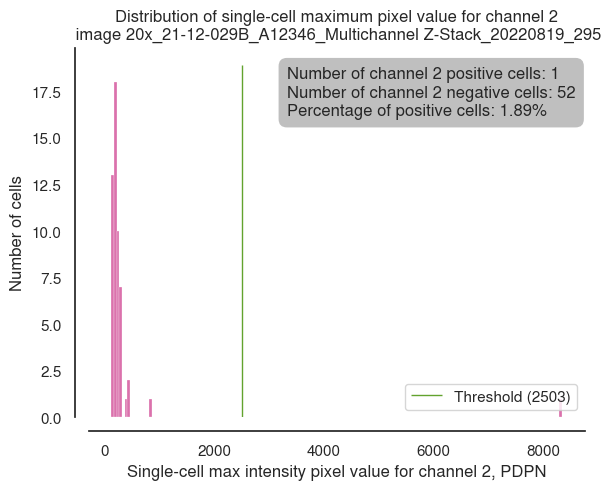

[INFO][2024/04/24 04:28:20 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438_iat2.h5...
[INFO][2024/04/24 04:28:20 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:28:20 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:28:20 PM] Loading objects/obj_type_2 (51277, 5) (51277 filtered: None)
[INFO][2024/04/24 04:28:32 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:28:32 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438_iat2.h5



 20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438_iat2.h5
Number of channel 1 positive cells: 1077
Number of channel 1 negative cells: 3015
Percentage of positive cells: 26.32%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


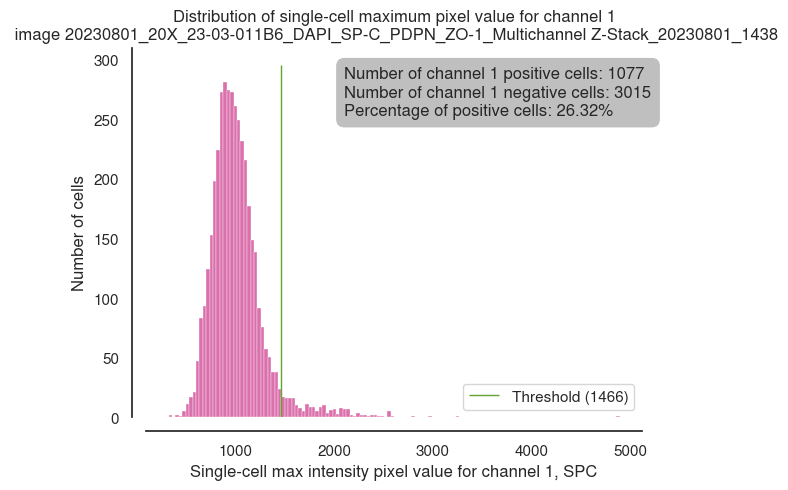


 20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438_iat2.h5
Number of channel 2 positive cells: 4092
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


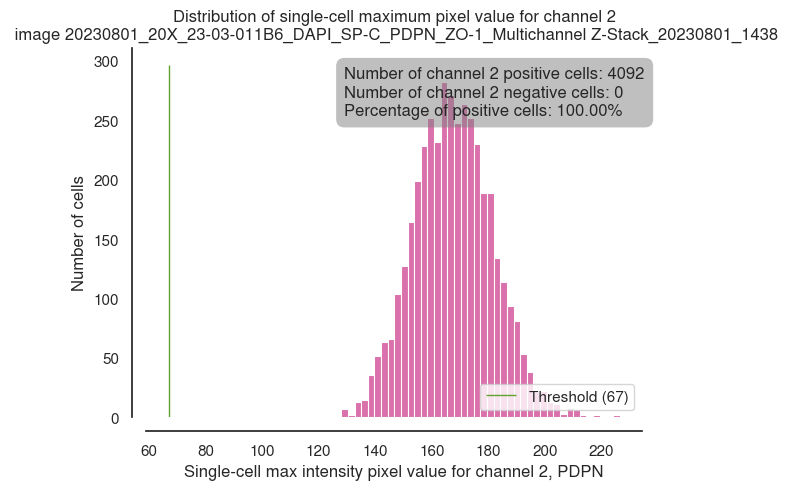

[INFO][2024/04/24 04:28:41 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1444_iat2.h5...
[INFO][2024/04/24 04:28:41 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:28:41 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:28:41 PM] Loading objects/obj_type_2 (44625, 5) (44625 filtered: None)
[INFO][2024/04/24 04:28:54 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:28:54 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1444_iat2.h5



 20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1444_iat2.h5
Number of channel 1 positive cells: 1614
Number of channel 1 negative cells: 215
Percentage of positive cells: 88.24%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


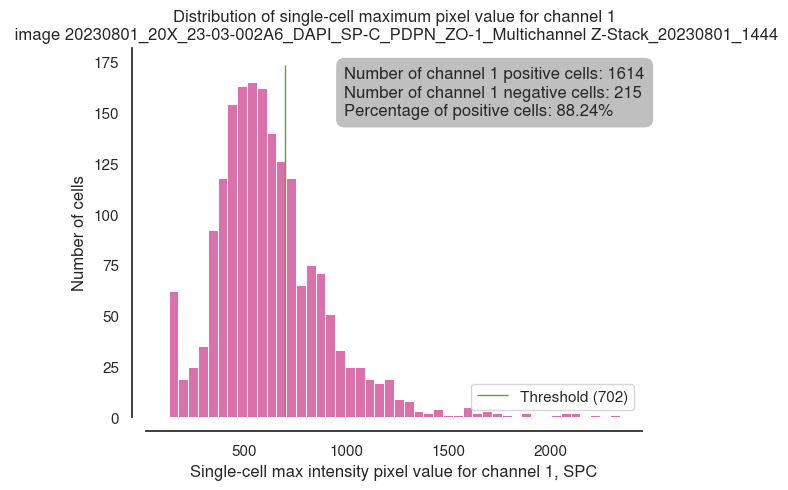


 20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1444_iat2.h5
Number of channel 2 positive cells: 1829
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


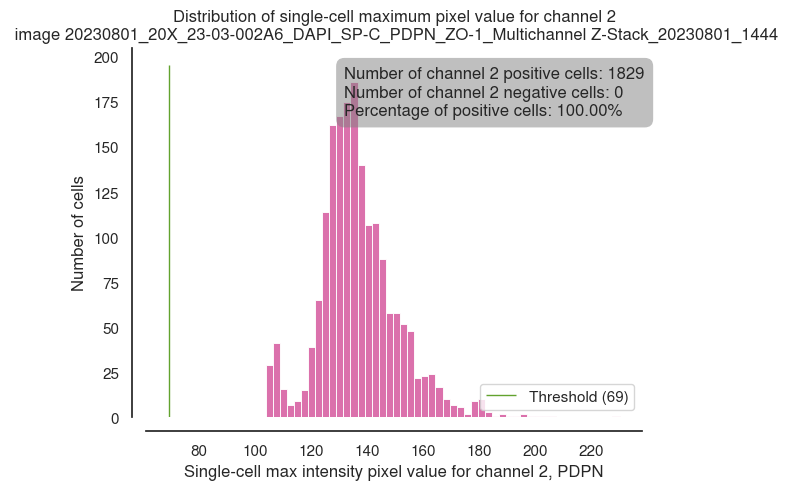

[INFO][2024/04/24 04:29:01 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_60X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1452_iat2.h5...
[INFO][2024/04/24 04:29:01 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:29:01 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:29:01 PM] Loading objects/obj_type_2 (337, 5) (337 filtered: None)
[INFO][2024/04/24 04:29:16 PM] Loading segmentation (90, 2304, 2304)
[INFO][2024/04/24 04:29:16 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_60X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1452_iat2.h5



 20230801_60X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1452_iat2.h5
Number of channel 1 positive cells: 25
Number of channel 1 negative cells: 6
Percentage of positive cells: 80.65%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


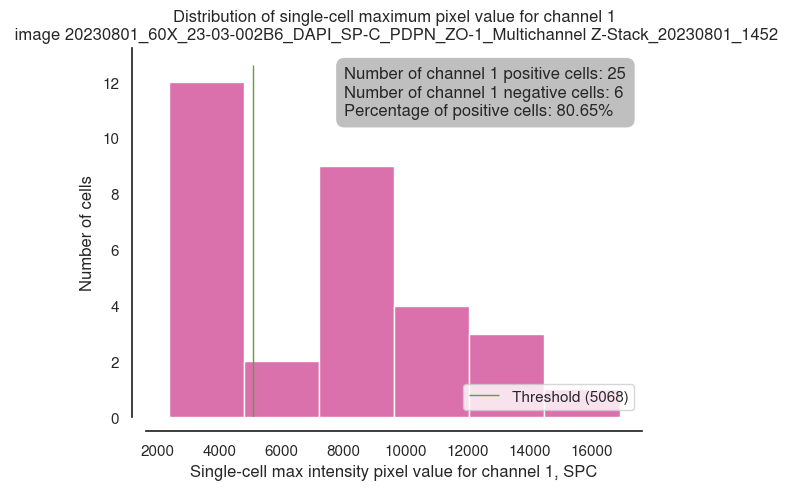


 20230801_60X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1452_iat2.h5
Number of channel 2 positive cells: 1
Number of channel 2 negative cells: 30
Percentage of positive cells: 3.23%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


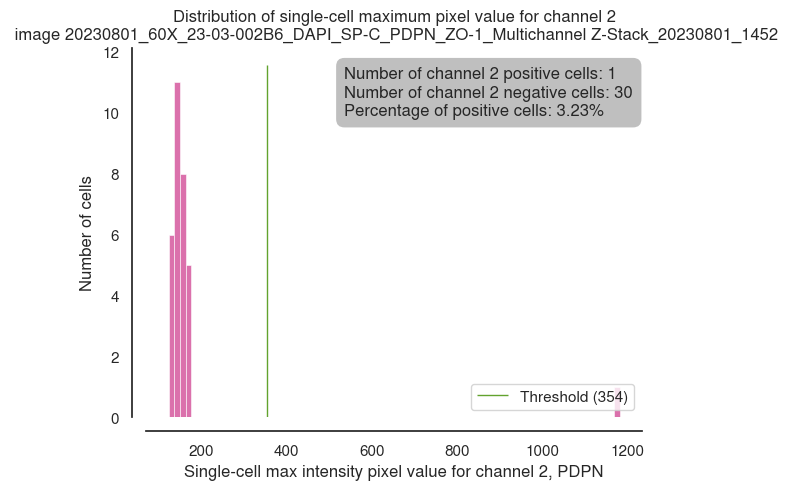

[INFO][2024/04/24 04:29:24 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1450_iat2.h5...
[INFO][2024/04/24 04:29:25 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:29:25 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:29:25 PM] Loading objects/obj_type_2 (57328, 5) (57328 filtered: None)
[INFO][2024/04/24 04:29:34 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:29:34 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1450_iat2.h5



 20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1450_iat2.h5
Number of channel 1 positive cells: 1924
Number of channel 1 negative cells: 3000
Percentage of positive cells: 39.07%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


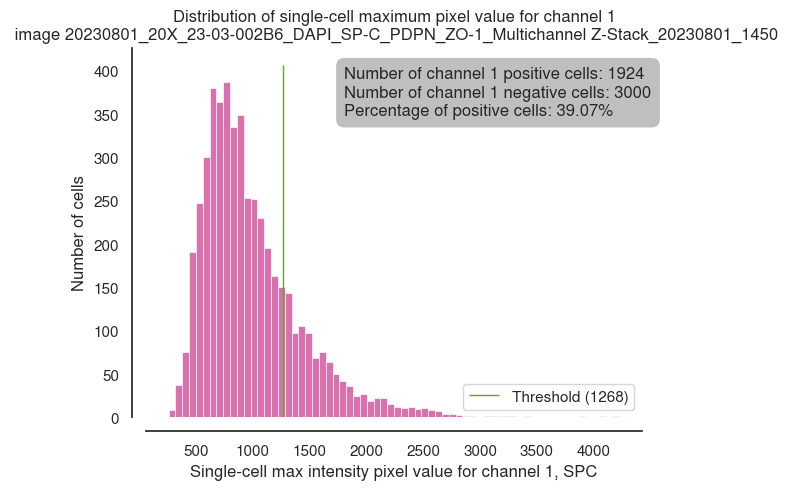


 20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1450_iat2.h5
Number of channel 2 positive cells: 4924
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


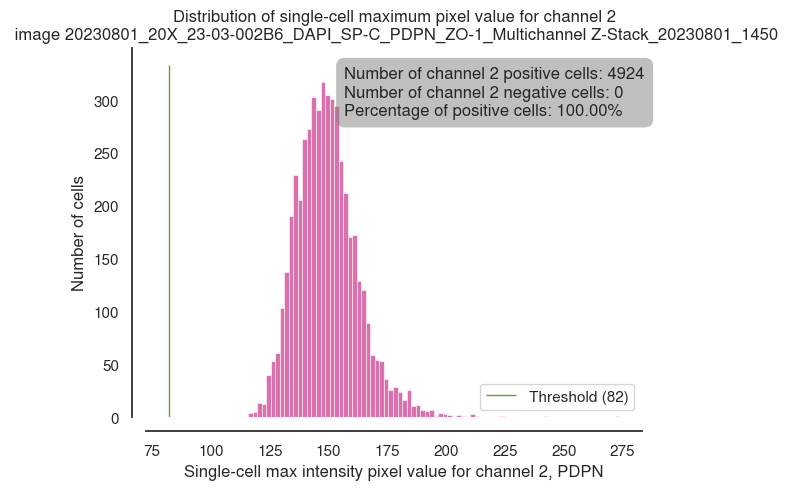

[INFO][2024/04/24 04:29:44 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1451_iat2.h5...
[INFO][2024/04/24 04:29:44 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:29:44 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:29:44 PM] Loading objects/obj_type_2 (55719, 5) (55719 filtered: None)
[INFO][2024/04/24 04:29:54 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:29:54 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1451_iat2.h5



 20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1451_iat2.h5
Number of channel 1 positive cells: 1524
Number of channel 1 negative cells: 2887
Percentage of positive cells: 34.55%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


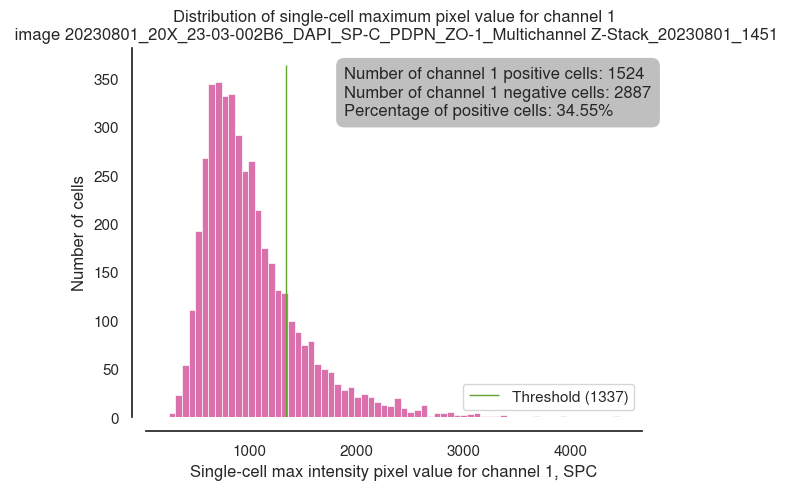


 20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1451_iat2.h5
Number of channel 2 positive cells: 4411
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


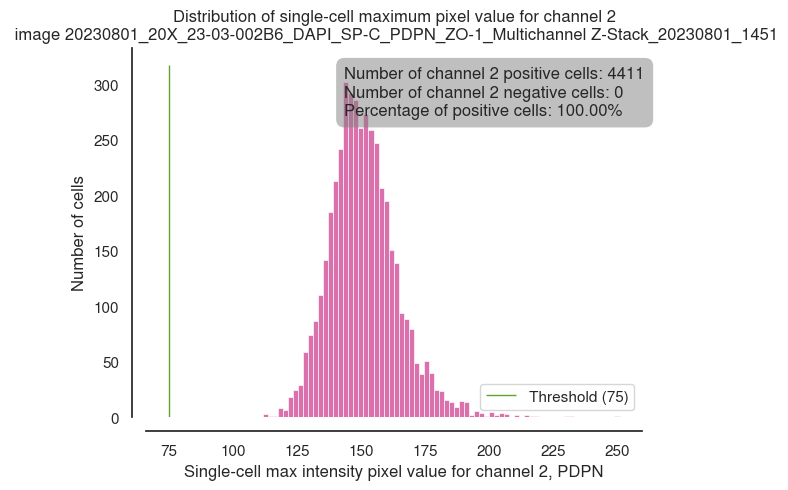

[INFO][2024/04/24 04:30:03 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1449_iat2.h5...
[INFO][2024/04/24 04:30:03 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:30:03 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:30:03 PM] Loading objects/obj_type_2 (67157, 5) (67157 filtered: None)
[INFO][2024/04/24 04:30:13 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:30:13 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1449_iat2.h5



 20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1449_iat2.h5
Number of channel 1 positive cells: 1939
Number of channel 1 negative cells: 3041
Percentage of positive cells: 38.94%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


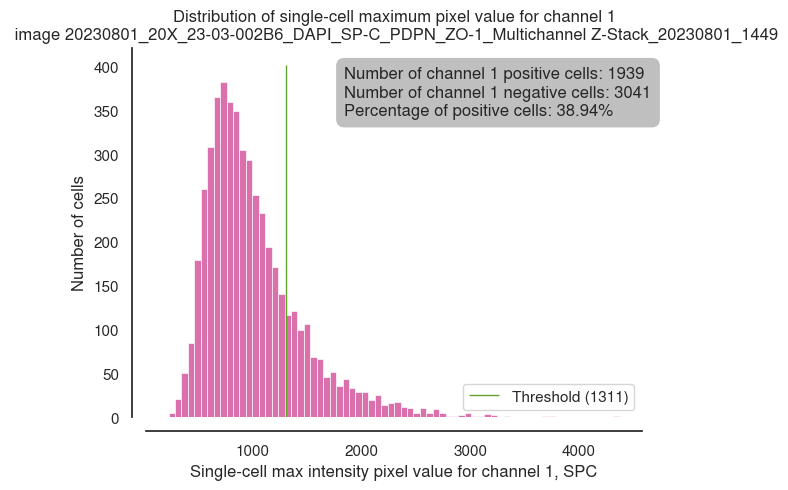


 20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1449_iat2.h5
Number of channel 2 positive cells: 4980
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


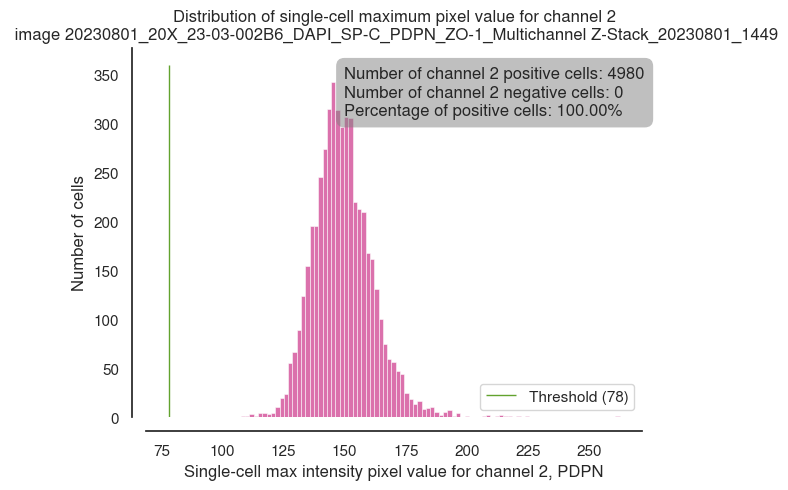

[INFO][2024/04/24 04:30:24 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1436_iat2.h5...
[INFO][2024/04/24 04:30:24 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:30:24 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:30:24 PM] Loading objects/obj_type_2 (55607, 5) (55607 filtered: None)
[INFO][2024/04/24 04:30:33 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:30:33 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1436_iat2.h5



 20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1436_iat2.h5
Number of channel 1 positive cells: 1625
Number of channel 1 negative cells: 1512
Percentage of positive cells: 51.80%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


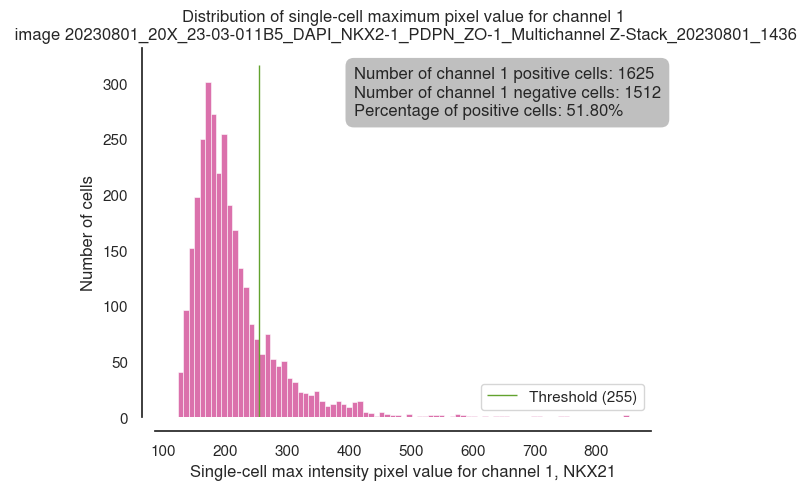


 20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1436_iat2.h5
Number of channel 2 positive cells: 3137
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


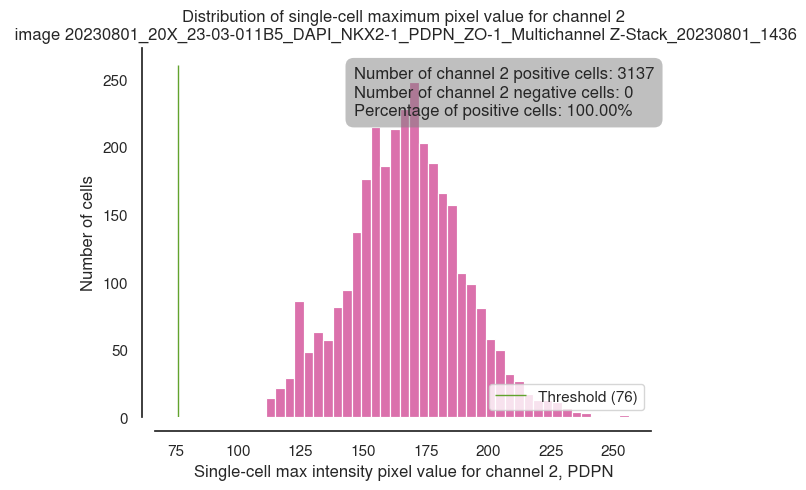

[INFO][2024/04/24 04:30:43 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_237_iat2.h5...
[INFO][2024/04/24 04:30:43 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:30:43 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:30:43 PM] Loading objects/obj_type_2 (28241, 5) (28241 filtered: None)
[INFO][2024/04/24 04:30:57 PM] Loading segmentation (81, 2304, 2304)
[INFO][2024/04/24 04:30:57 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_237_iat2.h5



 20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_237_iat2.h5
Number of channel 1 positive cells: 3593
Number of channel 1 negative cells: 1654
Percentage of positive cells: 68.48%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


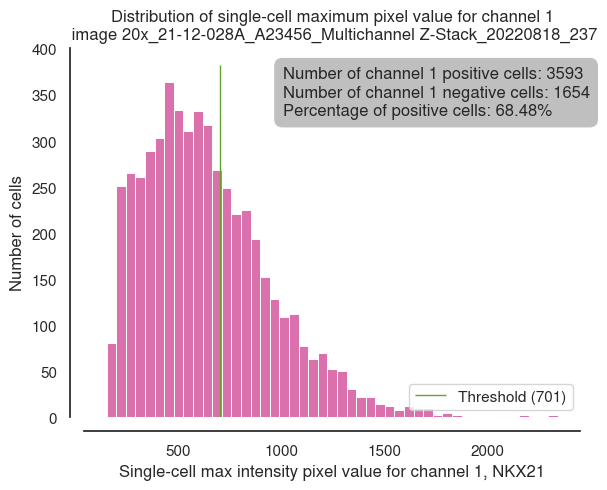


 20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_237_iat2.h5
Number of channel 2 positive cells: 3560
Number of channel 2 negative cells: 1687
Percentage of positive cells: 67.85%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


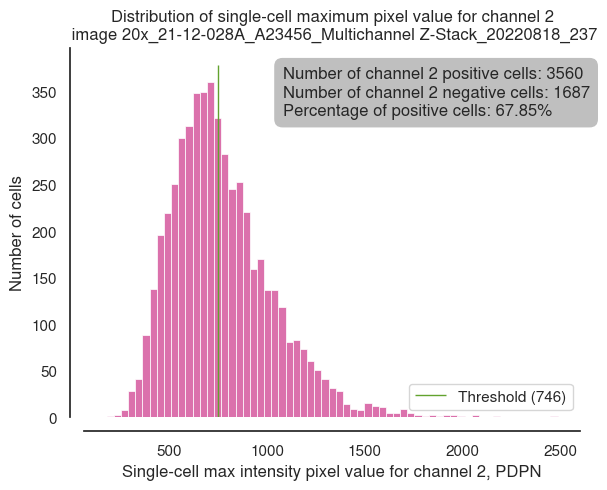

[INFO][2024/04/24 04:31:07 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1447_iat2.h5...
[INFO][2024/04/24 04:31:07 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:31:07 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:31:07 PM] Loading objects/obj_type_2 (74603, 5) (74603 filtered: None)
[INFO][2024/04/24 04:31:17 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:31:17 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1447_iat2.h5



 20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1447_iat2.h5
Number of channel 1 positive cells: 2
Number of channel 1 negative cells: 4924
Percentage of positive cells: 0.04%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


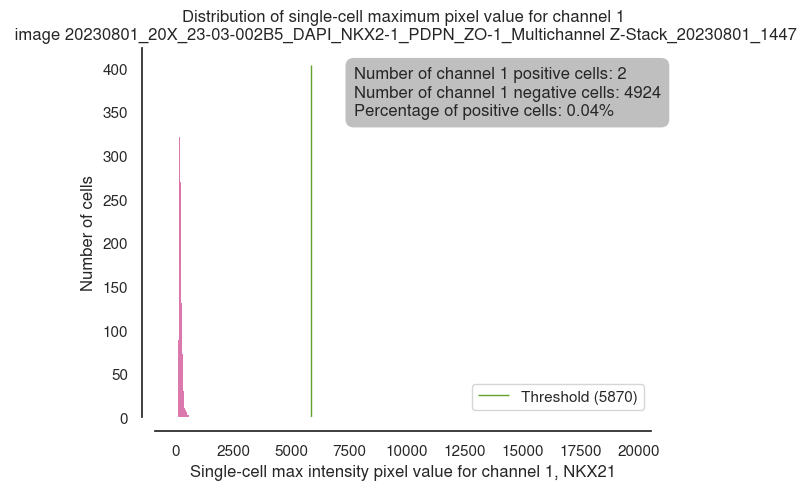


 20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1447_iat2.h5
Number of channel 2 positive cells: 1
Number of channel 2 negative cells: 4925
Percentage of positive cells: 0.02%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


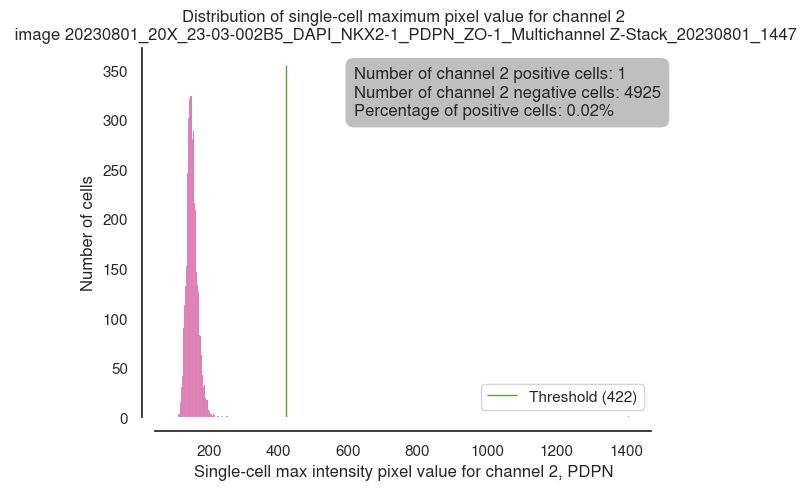

[INFO][2024/04/24 04:31:29 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1448_iat2.h5...
[INFO][2024/04/24 04:31:30 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:31:30 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:31:30 PM] Loading objects/obj_type_2 (72051, 5) (72051 filtered: None)
[INFO][2024/04/24 04:31:39 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:31:39 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1448_iat2.h5



 20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1448_iat2.h5
Number of channel 1 positive cells: 2364
Number of channel 1 negative cells: 2324
Percentage of positive cells: 50.43%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


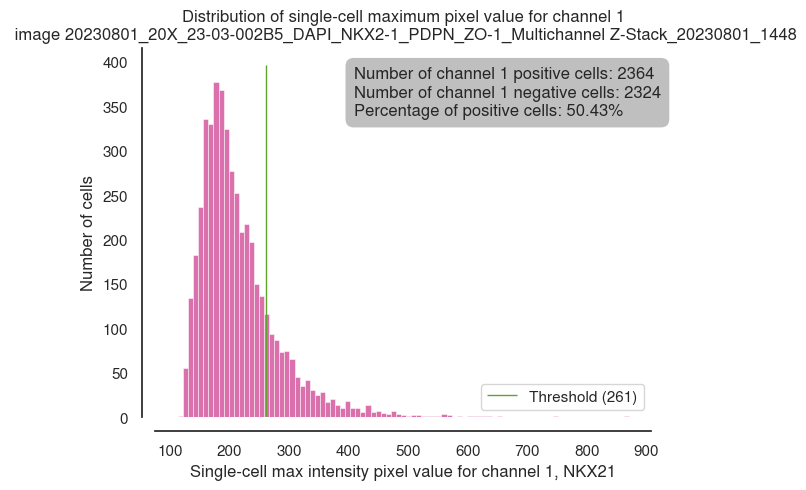


 20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1448_iat2.h5
Number of channel 2 positive cells: 4688
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


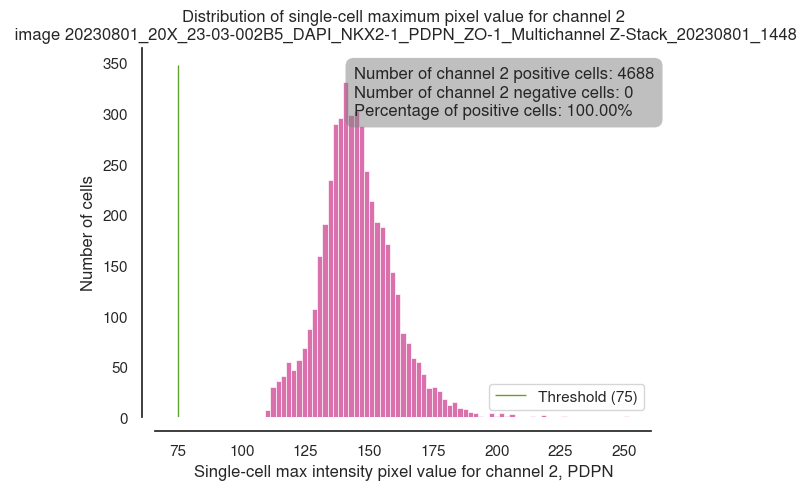

[INFO][2024/04/24 04:31:49 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5...
[INFO][2024/04/24 04:31:49 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:31:49 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:31:50 PM] Loading objects/obj_type_2 (52662, 5) (52662 filtered: None)
[INFO][2024/04/24 04:31:59 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:31:59 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5



 20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5
Number of channel 1 positive cells: 1281
Number of channel 1 negative cells: 2703
Percentage of positive cells: 32.15%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


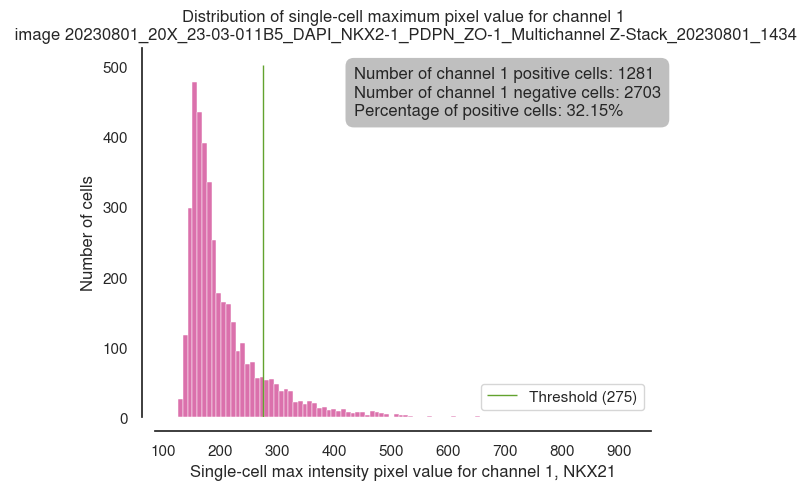


 20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5
Number of channel 2 positive cells: 3984
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


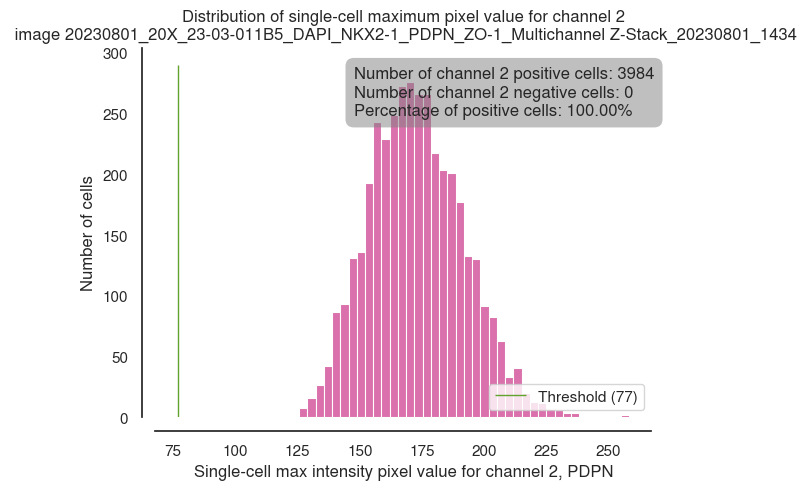

[INFO][2024/04/24 04:32:08 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_114_iat2.h5...
[INFO][2024/04/24 04:32:08 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:32:08 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:32:08 PM] Loading objects/obj_type_2 (23232, 5) (23232 filtered: None)
[INFO][2024/04/24 04:32:22 PM] Loading segmentation (81, 2304, 2304)
[INFO][2024/04/24 04:32:22 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_114_iat2.h5



 20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_114_iat2.h5
Number of channel 1 positive cells: 2288
Number of channel 1 negative cells: 1094
Percentage of positive cells: 67.65%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


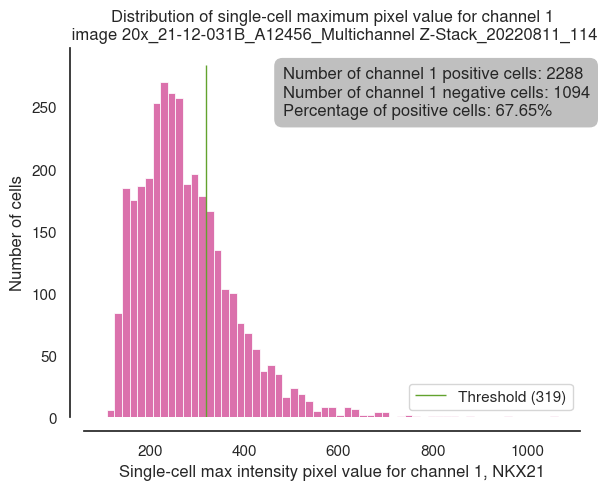


 20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_114_iat2.h5
Number of channel 2 positive cells: 2978
Number of channel 2 negative cells: 404
Percentage of positive cells: 88.05%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


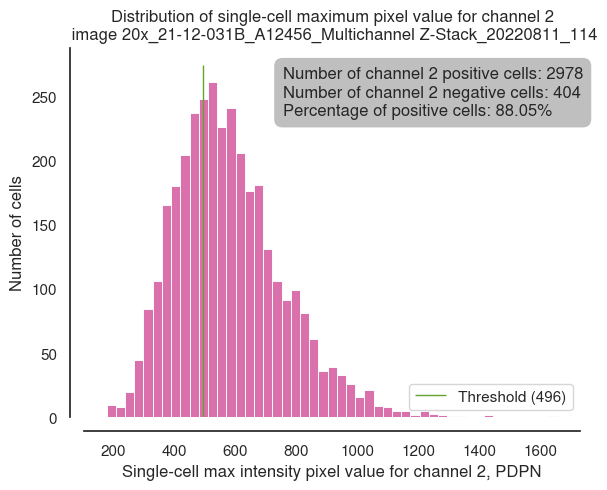

[INFO][2024/04/24 04:32:32 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1435_iat2.h5...
[INFO][2024/04/24 04:32:32 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:32:32 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:32:32 PM] Loading objects/obj_type_2 (50760, 5) (50760 filtered: None)
[INFO][2024/04/24 04:32:42 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:32:42 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1435_iat2.h5



 20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1435_iat2.h5
Number of channel 1 positive cells: 1091
Number of channel 1 negative cells: 1866
Percentage of positive cells: 36.90%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


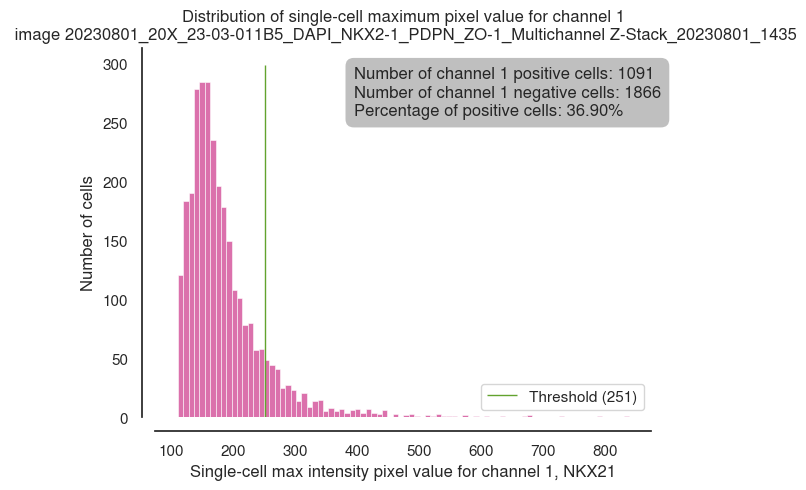


 20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1435_iat2.h5
Number of channel 2 positive cells: 2957
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


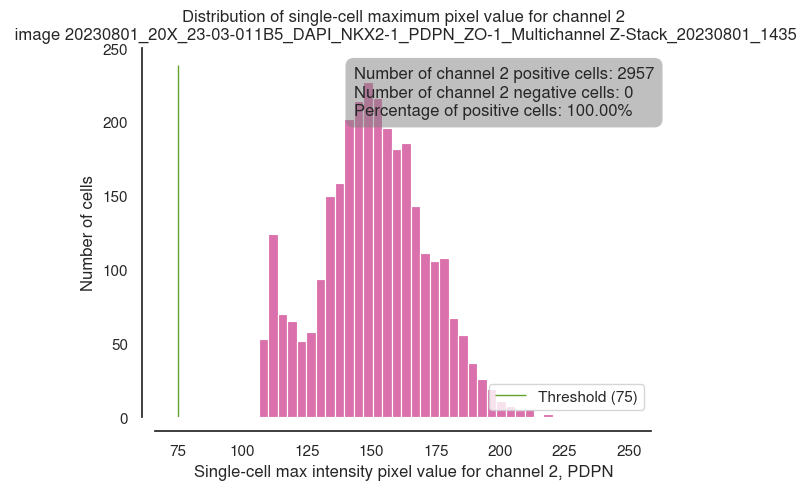

[INFO][2024/04/24 04:32:50 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1441_iat2.h5...
[INFO][2024/04/24 04:32:50 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:32:50 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:32:51 PM] Loading objects/obj_type_2 (49364, 5) (49364 filtered: None)
[INFO][2024/04/24 04:33:02 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:33:02 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1441_iat2.h5



 20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1441_iat2.h5
Number of channel 1 positive cells: 2213
Number of channel 1 negative cells: 1763
Percentage of positive cells: 55.66%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


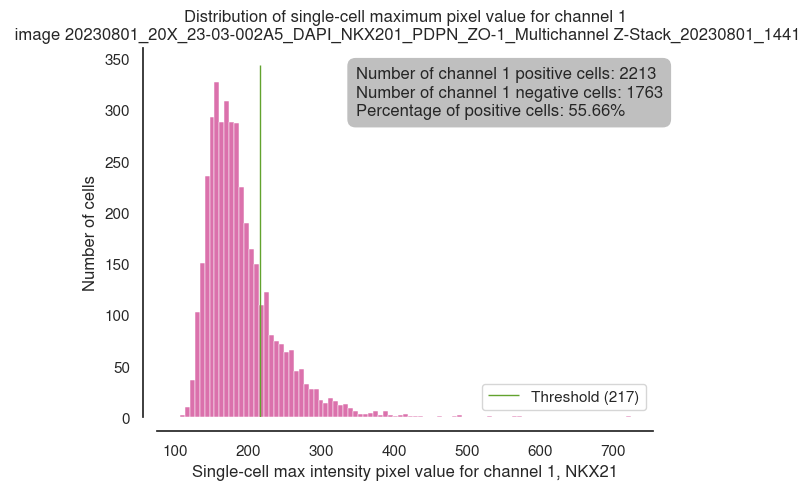


 20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1441_iat2.h5
Number of channel 2 positive cells: 3768
Number of channel 2 negative cells: 208
Percentage of positive cells: 94.77%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


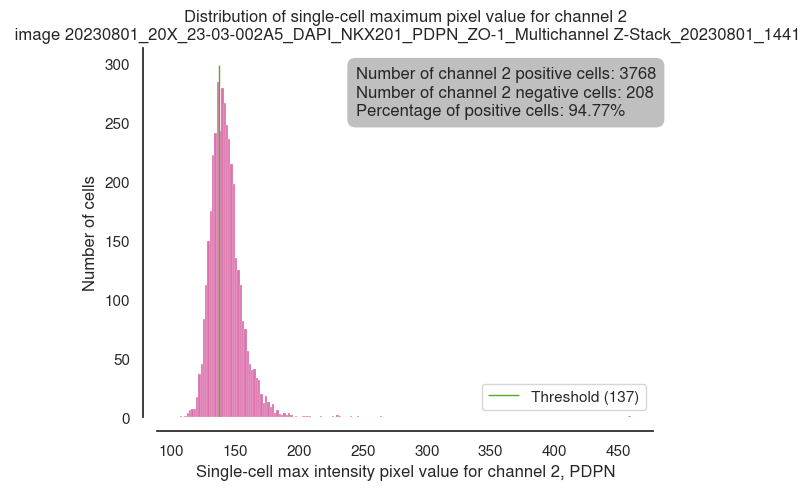

[INFO][2024/04/24 04:33:10 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1442_iat2.h5...
[INFO][2024/04/24 04:33:10 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:33:11 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:33:11 PM] Loading objects/obj_type_2 (30775, 5) (30775 filtered: None)
[INFO][2024/04/24 04:33:22 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:33:22 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1442_iat2.h5



 20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1442_iat2.h5
Number of channel 1 positive cells: 1938
Number of channel 1 negative cells: 750
Percentage of positive cells: 72.10%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


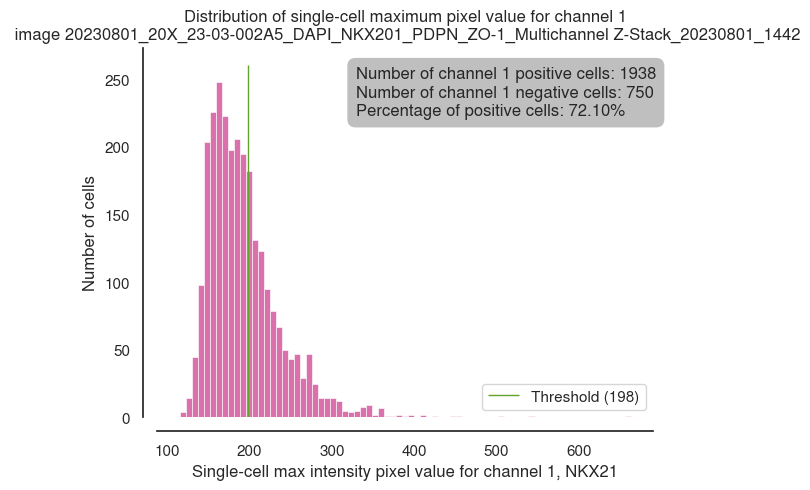


 20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1442_iat2.h5
Number of channel 2 positive cells: 2688
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


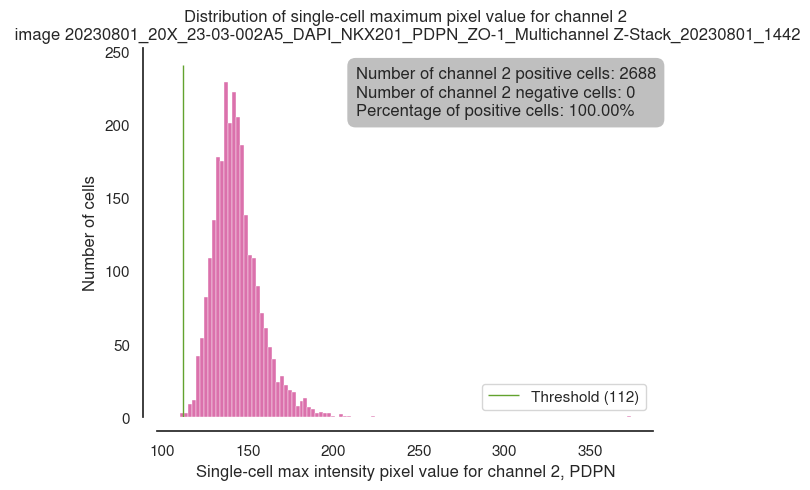

[INFO][2024/04/24 04:33:30 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1446_iat2.h5...
[INFO][2024/04/24 04:33:30 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:33:30 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:33:30 PM] Loading objects/obj_type_2 (61201, 5) (61201 filtered: None)
[INFO][2024/04/24 04:33:40 PM] Loading segmentation (61, 2304, 2304)
[INFO][2024/04/24 04:33:40 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1446_iat2.h5



 20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1446_iat2.h5
Number of channel 1 positive cells: 2251
Number of channel 1 negative cells: 3040
Percentage of positive cells: 42.54%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


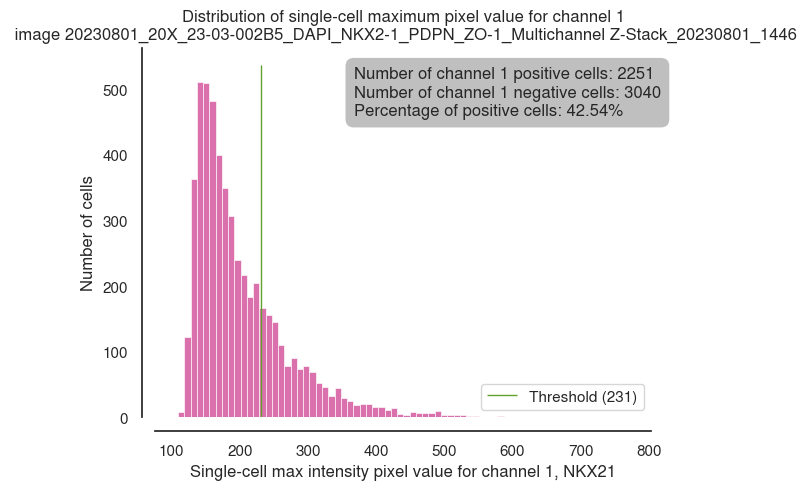


 20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1446_iat2.h5
Number of channel 2 positive cells: 5291
Number of channel 2 negative cells: 0
Percentage of positive cells: 100.00%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


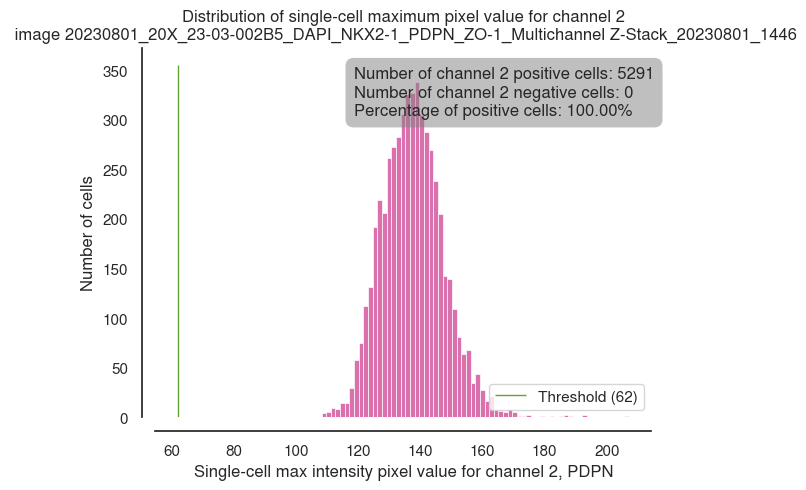

[INFO][2024/04/24 04:33:50 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1443_iat2.h5...
[INFO][2024/04/24 04:33:50 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:33:50 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:33:50 PM] Loading objects/obj_type_2 (36733, 5) (36733 filtered: None)
[INFO][2024/04/24 04:34:02 PM] Loading segmentation (51, 2304, 2304)
[INFO][2024/04/24 04:34:02 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1443_iat2.h5



 20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1443_iat2.h5
Number of channel 1 positive cells: 1888
Number of channel 1 negative cells: 1378
Percentage of positive cells: 57.81%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


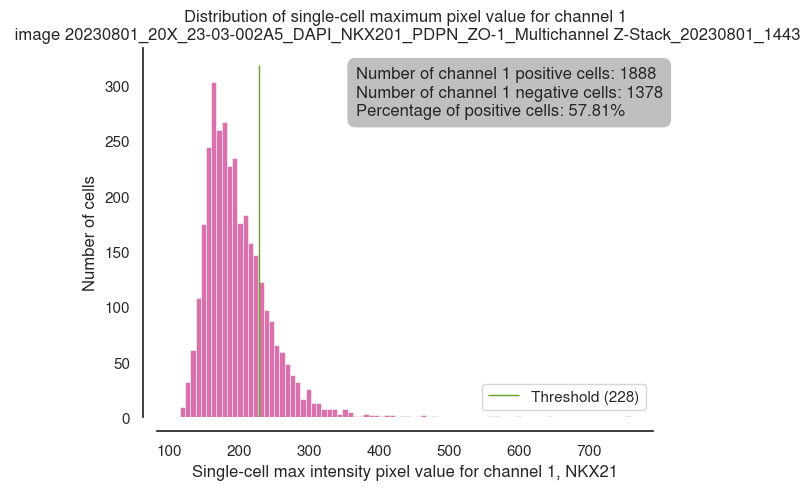


 20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1443_iat2.h5
Number of channel 2 positive cells: 1
Number of channel 2 negative cells: 3265
Percentage of positive cells: 0.03%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


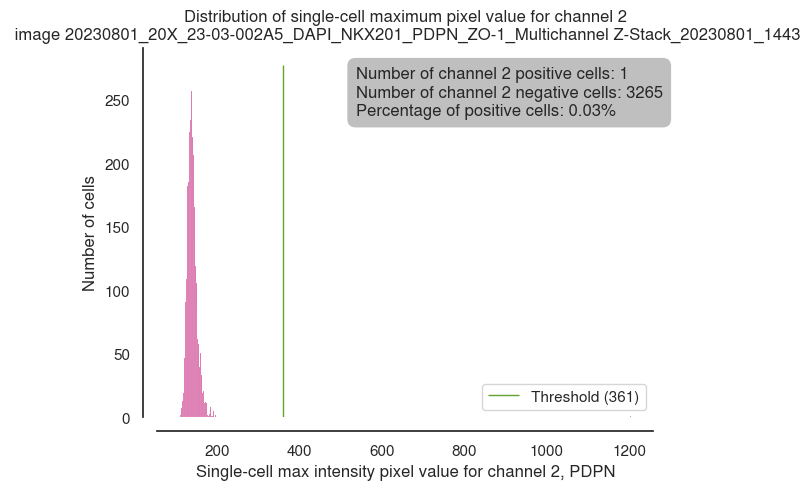

[INFO][2024/04/24 04:34:11 PM] Opening HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5...
[INFO][2024/04/24 04:34:11 PM] Loading tracks/obj_type_2
[INFO][2024/04/24 04:34:11 PM] Loading LBEP/obj_type_2
[INFO][2024/04/24 04:34:11 PM] Loading objects/obj_type_2 (27786, 5) (27786 filtered: None)
[INFO][2024/04/24 04:34:25 PM] Loading segmentation (81, 2304, 2304)
[INFO][2024/04/24 04:34:25 PM] Closing HDF file: /mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5



 20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5
Number of channel 1 positive cells: 3046
Number of channel 1 negative cells: 843
Percentage of positive cells: 78.32%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


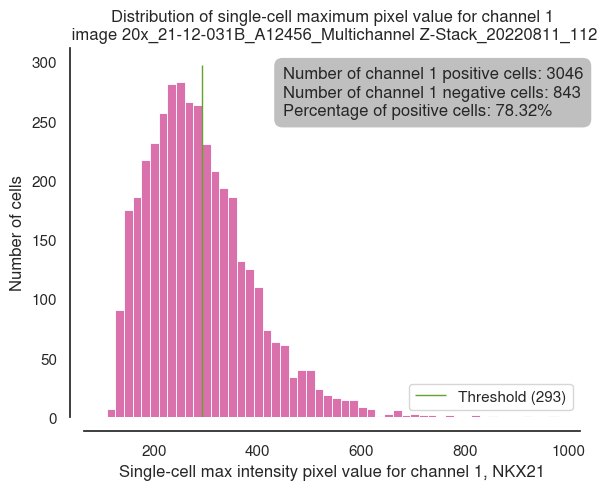


 20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5
Number of channel 2 positive cells: 3479
Number of channel 2 negative cells: 410
Percentage of positive cells: 89.46%


/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/homunc/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


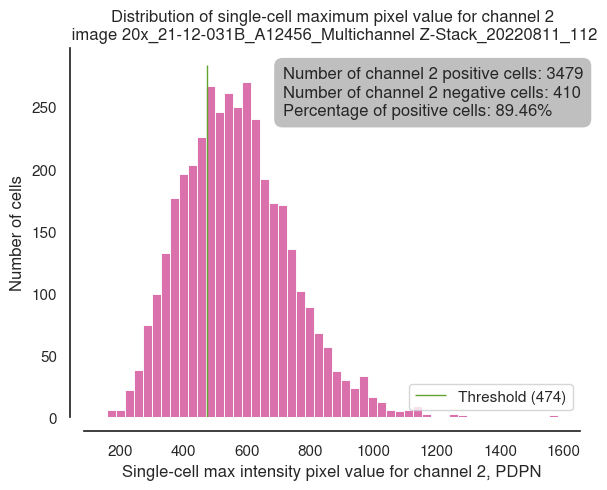

In [88]:
root_dir = '/mnt/NEMO/home/shared/Lung on Chip/homuncu_loc_image_analysis'
markers = ['NKX21', 'PDPN', 'SPC']

sc_fn_pattern = os.path.join(root_dir, f'iAT1_iAT2_experiments/*/sc_analyses/*iat2.h5')
sc_fns = glob.glob(sc_fn_pattern)


for sc_fn in tqdm(sc_fns, total = len(sc_fns)):
    sc_fn_basename = os.path.basename(sc_fn)
    sc_base_dir = os.path.dirname(sc_fn)
    output_dir = os.path.join(sc_base_dir, 'proportional_thresholding')
    os.makedirs(output_dir, exist_ok = True)
    # load labels (tracks and segmentation)
    with btrack.io.HDF5FileHandler(sc_fn, 
                                       'r', 
                                           obj_type='obj_type_2'#'obj_type_2'
                                       ) as reader:
            # tracks = [t for t in reader.tracks if np.mean(t.properties['area']) > 1000]
            tracks = [t for t in reader.tracks if len(t) >= 3] #reader.tracks#
            segmentation = reader.segmentation
    napari_tracks, properties, graph = btrack.utils.tracks_to_napari(tracks, ndim = 2)
    recolored_segmentation = btrack.utils.update_segmentation(segmentation, tracks)

    for channel, marker in enumerate(sc_fn.split('/')[-3].split('_')):  
        if marker not in markers:
            continue
        
        sc_intensities = [np.mean(track.properties['mean_intensity'][:,channel]) for track in tracks]
        max_sc_intensity = np.nanmax(sc_intensities)
        threshold = int(pct_threshold * max_sc_intensity)
    
        n_positive = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) >= threshold])
        n_negative = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) < threshold])
        
        print('\n', sc_fn_basename)
        print(f'Number of channel {channel} positive cells: {n_positive}')
        print(f'Number of channel {channel} negative cells: {n_negative}')
        percentage = n_positive / (n_positive+n_negative) *100
        print(f'Percentage of positive cells: {percentage:.2f}%')
        
        # sc_intensities = [np.max(t.properties['mean_intensity'][:,channel]) for t in tracks]
        ax = sns.histplot(sc_intensities)
        plt.vlines(x=threshold,
               ymax=ax.get_ylim()[-1],
               ymin=ax.get_ylim()[0],
               color=sns.color_palette('PiYG')[-1],  # my favorite colors :D
               linewidth=1)
        sns.despine(offset = 10)
        plt.xlabel(f'Single-cell max intensity pixel value for channel {channel}, {marker}')
        plt.ylabel('Number of cells')
        plt.legend([f'Threshold ({threshold})'], loc='lower right')
        ax.text(0.4, 0.95, 
            f'Number of channel {channel} positive cells: {n_positive}\nNumber of channel {channel} negative cells: {n_negative}\nPercentage of positive cells: {percentage:.2f}%',
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='grey', edgecolor='none', alpha=0.5))
        
        # image_name = os.path.basename(image_fn).replace('.tif','')
        image_ID = os.path.basename(sc_fn).replace('_iat2.h5','')
        
        plt.title(f'Distribution of single-cell maximum pixel value for channel {channel}\n image {image_ID}')
        output_fn = os.path.join(output_dir, f'{image_ID}_ch{channel}_proportional_threshold_quantification.png')
        plt.savefig(output_fn, bbox_inches = 'tight', dpi = 314)
        plt.show()
        

# Save out as df/excel

In [ ]:
### define parameters to plot in table
cols = ['Cell ID', f'Max. int. {channels(0).name}', f'Max. int. {channels(1).name}', f'Max. int. {channels(2).name}', f'Max. int. {channels(3).name}', 'Average X', 'Average Y']
### extract some intial measurements
df = pd.DataFrame([(track.ID, np.nanmax(track['mean_intensity-0']),np.nanmax(track['mean_intensity-1']),np.nanmax(track['mean_intensity-2']),np.nanmax(track['mean_intensity-3']), np.mean(track.x), np.mean(track.y)) for track in tracks], columns= cols)